# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [4]:

# Read the housing.csv file
housing = pd.read_csv('../data/housing.csv')


In [5]:
# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(housing.head())

First 5 rows of the dataset:
  0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0   0.02731   0.00   7.070  0  0.4690  6.4210  78...                                             
1   0.02729   0.00   7.070  0  0.4690  7.1850  61...                                             
2   0.03237   0.00   2.180  0  0.4580  6.9980  45...                                             
3   0.06905   0.00   2.180  0  0.4580  7.1470  54...                                             
4   0.02985   0.00   2.180  0  0.4580  6.4300  58...                                             


In [6]:
# Get information about the dataframe
print("\nDataframe info:")
print(housing.info())

# Generate descriptive statistics
print("\nDescriptive statistics:")
print(housing.describe())


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB
None

Descriptive statistics:
       0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
count                                                 505                                             
unique                                                505                                             
top      0.02731   0.00   7.070  0  0.4690  6.4210  78...                                             
freq               

In [8]:
# Check for missing values
print("\nMissing values in each column:")
print(housing.isnull().sum())

# Check the actual columns in the dataset
print("\nActual columns in the dataset:")
print(housing.columns.tolist())


Missing values in each column:
0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00    0
dtype: int64

Actual columns in the dataset:
[' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00']


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

/var/folders/yj/_2dcl_l16cl6dr1bp7h1j6hw0000gn/T/ipykernel_24125/4069269236.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  housing[col] = pd.to_numeric(housing[col], errors='ignore')



Descriptive statistics for numeric columns:
               0           1           2           3           4           5   \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean     3.620667   11.350495   11.154257    0.069307    0.554728    6.284059   
std      8.608572   23.343704    6.855868    0.254227    0.115990    0.703195   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082210    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.259150    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.678220   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean    68.581584    3.794459    9.566337  408.459406   18.4617

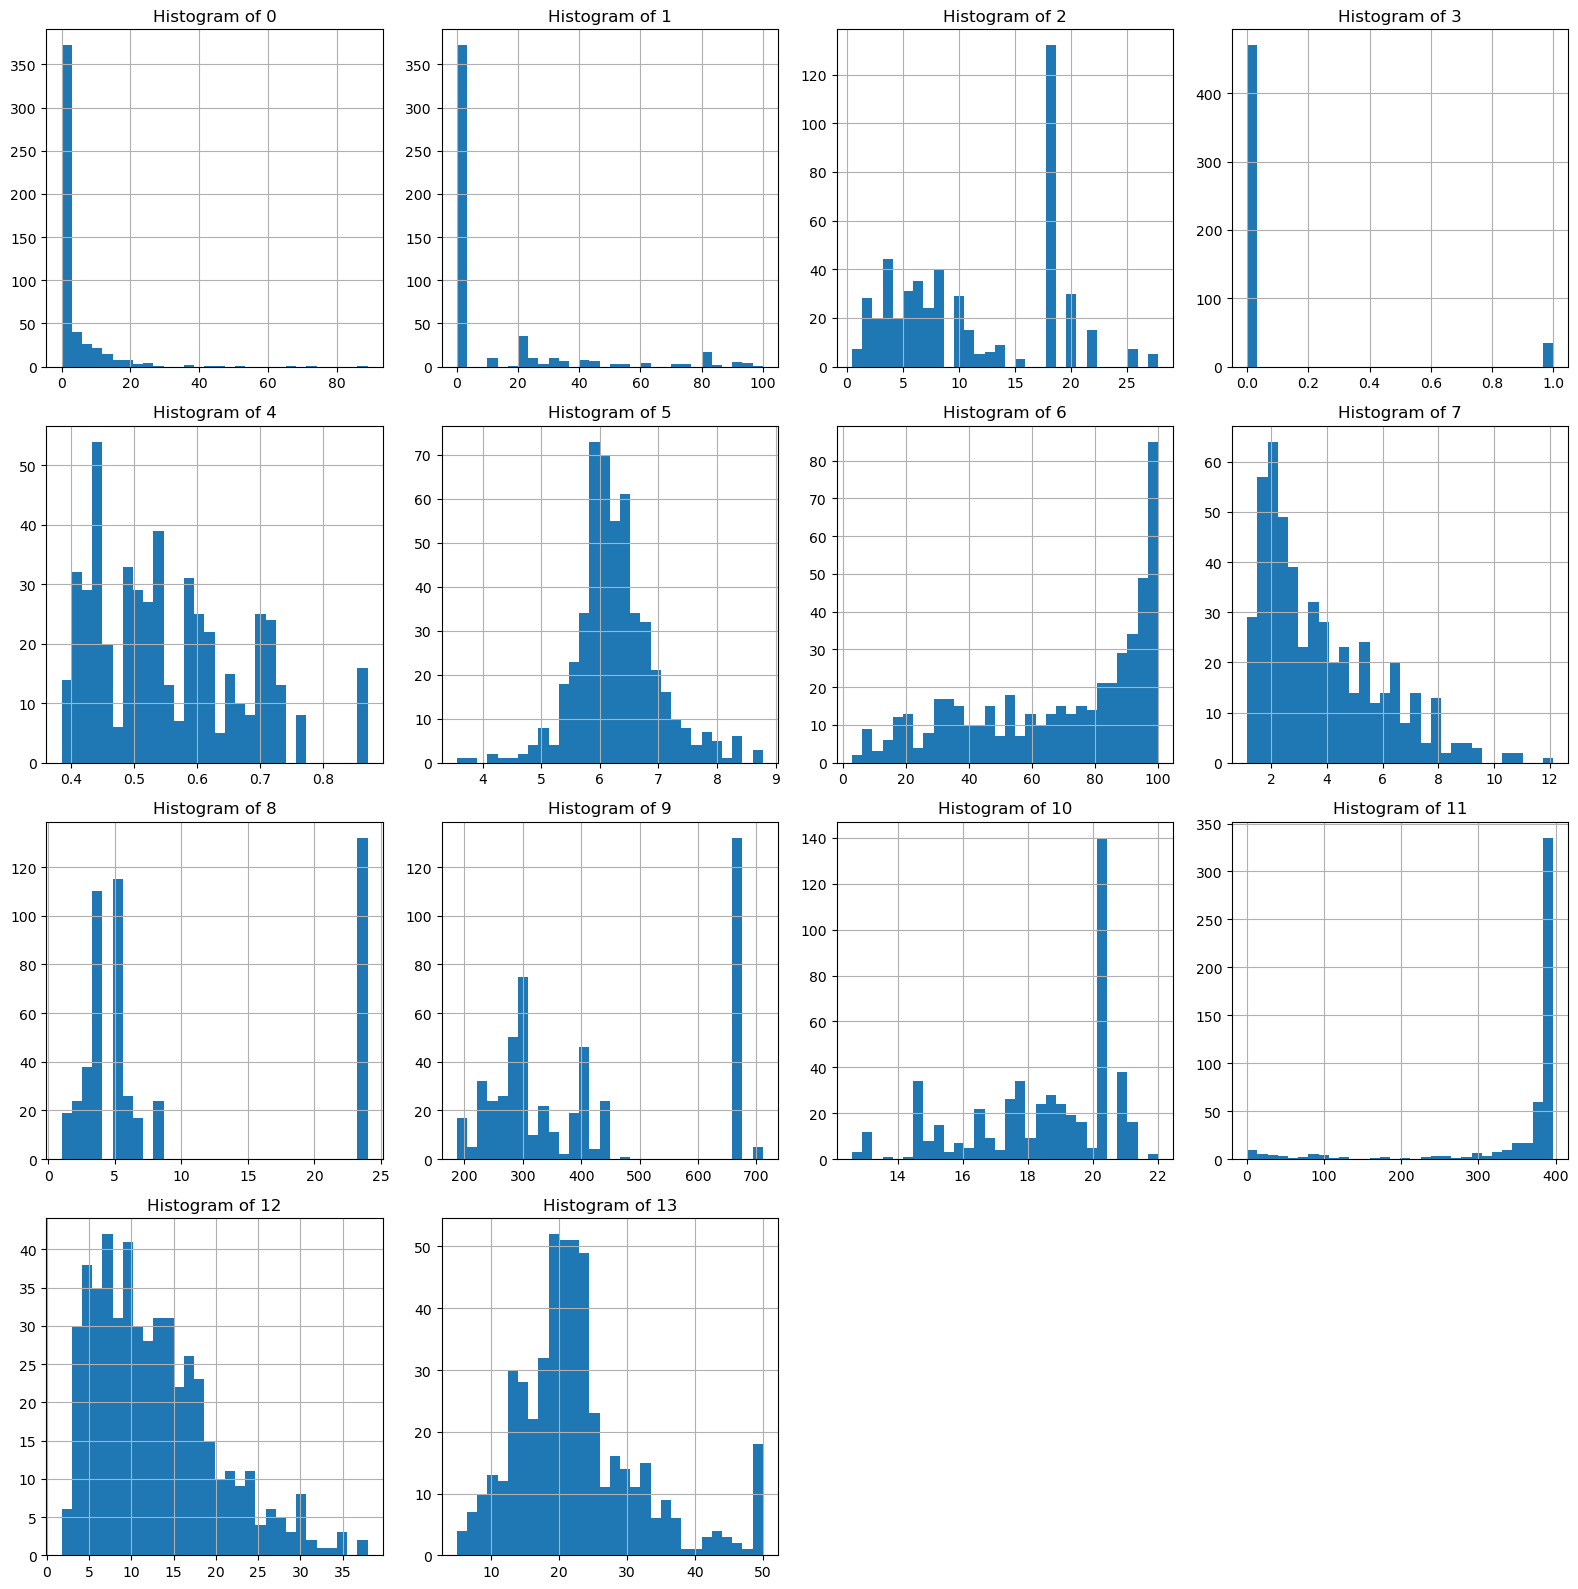

In [15]:
# If all columns appear to be strings or objects, we need to convert them to numeric
# First, let's check if we have a single column with space-separated values
if len(housing.columns) == 1:
    print("\nDetected single column with space-separated values")
    # Try to split the first column by spaces and create a proper dataframe
    first_row = housing.iloc[0, 0]
    if isinstance(first_row, str) and ' ' in first_row:
        # Split the single column into multiple columns
        split_data = housing[housing.columns[0]].str.split(expand=True)
        print("\nSplit data preview:")
        print(split_data.head())
        
        # Replace the original dataframe with the split data
        housing = split_data
        
        # Convert all columns to numeric where possible
        for col in housing.columns:
            housing[col] = pd.to_numeric(housing[col], errors='ignore')
        
        print("\nConverted data types:")
        print(housing.dtypes)

# Another approach: If we have a single string column with all data
if len(housing.columns) == 1:
    print("\nAttempting to parse single column with different delimiters")
    # Try common delimiters
    for delimiter in [',', ';', '\t', ' ']:
        try:
            test_df = pd.read_csv('housing.csv', sep=delimiter)
            if len(test_df.columns) > 1:
                housing = test_df
                print(f"Successfully parsed with delimiter: '{delimiter}'")
                break
        except:
            continue

# Try to convert all columns to numeric where possible
for col in housing.columns:
    try:
        housing[col] = pd.to_numeric(housing[col], errors='ignore')
    except:
        pass

# Generate descriptive statistics for numeric columns
numeric_cols = housing.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print("\nDescriptive statistics for numeric columns:")
    print(housing[numeric_cols].describe())

    # Task: Make histograms of all numeric columns
    print("\nPlotting histograms for numeric columns...")
    
    # Calculate the grid size based on number of columns
    n_cols = len(numeric_cols)
    n_rows = math.ceil(n_cols / 4)  # Up to 4 columns per row
    
    plt.figure(figsize=(16, n_rows * 4))
    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, 4, i+1)
        housing[col].hist(bins=30)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo numeric columns found. Cannot create histograms.")
    print("Let's examine the first row of data to help determine the structure:")
    print(housing.iloc[0])

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

2. Check out what variables correlates the most with "median house value"

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [2]:
import scipy.stats as stats

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

4. Save our predicting variable to `y`.

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [3]:
from sklearn import metrics

#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

2. Print the mean_squared_error and R^2-score again. What has happened?

3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [4]:
from sklearn.ensemble import RandomForestRegressor

2. Make prediction on the test data and evaluate you results.